### Question 2


Dithering by Floyd-Steinberg:
Particularly for photos containing gradients, this approach produces a more aesthetically pleasing outcome by distributing a pixel's quantization mistake across its surrounding pixels.


Ninke-Judice-Jarvis Dithering:
This algorithm distributes error similarly to Floyd-Steinberg, but it does so over a greater number of nearby pixels. At the expense of more computing complexity, it offers even higher quality.

comparison
A rather smooth gradient should be visible in the Floyd-Steinberg dithered image.
Because of the wider error distribution, the Jarvis-Judice-Ninke dithered image might display finer features.


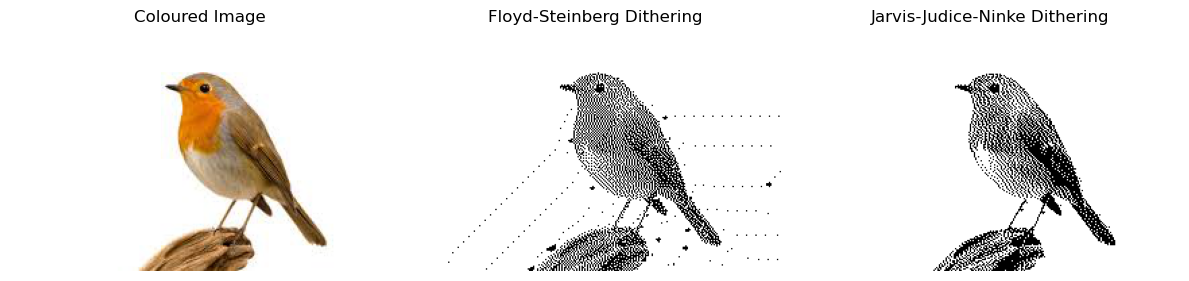

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def floyd_steinberg_dithering(image):
    # Converting the home work 2 image to grayscale
    gray_img = image.convert('L')
    pixels = np.array(gray_img)
    height, width = pixels.shape
    
    # Creating a new image for the output
    dithered_image = np.copy(pixels)
    
    for y in range(height):
        for x in range(width):
            old_pixel = dithered_image[y, x] 
            new_pixel = 255 * (old_pixel > 127)  
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            
            if x + 1 < width:
                dithered_image[y, x + 1] += quant_error * 7 / 16
            if x - 1 >= 0 and y + 1 < height:
                dithered_image[y + 1, x - 1] += quant_error * 3 / 16
            if y + 1 < height:
                dithered_image[y + 1, x] += quant_error * 5 / 16
            if x + 1 < width and y + 1 < height:
                dithered_image[y + 1, x + 1] += quant_error * 1 / 16
    
    return Image.fromarray(np.clip(dithered_image, 0, 255).astype('uint8'))

def jarvis_judice_ninke_dithering(image):
    gray_img = image.convert('L')
    pixels = np.array(gray_img)
    height, width = pixels.shape
    
    # Creating a new image for the output
    dithered_image = np.copy(pixels)
    
    for y in range(height):
        for x in range(width):
            old_pixel = dithered_image[y, x]
            new_pixel = 255 * (old_pixel > 127)  
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel
            
            if x + 1 < width:
                dithered_image[y, x + 1] += quant_error * 7 / 48
            if x + 2 < width:
                dithered_image[y, x + 2] += quant_error * 5 / 48
            if y + 1 < height and x - 1 >= 0:
                dithered_image[y + 1, x - 1] += quant_error * 3 / 48
            if y + 1 < height:
                dithered_image[y + 1, x] += quant_error * 5 / 48
            if y + 1 < height and x + 1 < width:
                dithered_image[y + 1, x + 1] += quant_error * 3 / 48
            if y + 1 < height and x + 2 < width:
                dithered_image[y + 1, x + 2] += quant_error * 1 / 48
            
    return Image.fromarray(np.clip(dithered_image, 0, 255).astype('uint8'))

# Loading the image
image_path = 'IMAGE_HW2.jpeg'  
image = Image.open(image_path)

floyd_steinberg_result = floyd_steinberg_dithering(image)
jarvis_judice_ninke_result = jarvis_judice_ninke_dithering(image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Coloured Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(floyd_steinberg_result, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(jarvis_judice_ninke_result, cmap='gray')
plt.title('Jarvis-Judice-Ninke Dithering')
plt.axis('off')

plt.tight_layout()
plt.show()
